**Long Short-Term Memory (LSTM) is a type of Recurrent Neural Network (RNN) designed to handle sequences of data**

Long short-term memory (LSTM) is an artificial neural network used in the fields of artificial intelligence and deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. Such a recurrent neural network (RNN) can process not only single data points (such as images), but also entire sequences of data (such as speech or video). This characteristic makes LSTM networks ideal for processing and predicting data. For example, LSTM is applicable to tasks such as unsegmented, connected handwriting recognition, speech recognition, machine translation, speech activity detection, robot control, video games, and healthcare.

[wiki](https://en.wikipedia.org/wiki/Long_short-term_memory)
[researchG](https://)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
tf.random.set_seed(42)


In [5]:
data = np.array([10, 20, 30, 40, 50], dtype=float)
window_size = 2
X = []
y = []

for i in range(len(data) - window_size):
  X.append(data[i:i+window_size])
  y.append(data[i+window_size])    

X = np.array(X).reshape(-1, window_size, 1) # Reshape input to (batch_size, wi
y = np.array(y)
# Create the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


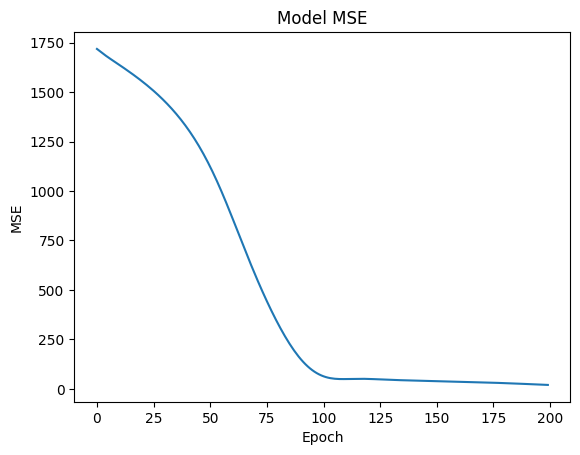

In [6]:
history = model.fit(X, y, epochs=200, verbose=0)
# Plot the MSE during training
plt.plot(history.history['loss'])
plt.title('Model MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [7]:
input_data = np.array([20, 25]).reshape(1, window_size, 1)  
predicted_temperature = model.predict(input_data)
print(predicted_temperature)

1/1 [==============================] - 0s 244ms/step
[[35.930134]]


In [13]:
np.random.seed(42)
tf.random.set_seed(42)
# Preprocess the dataset
temperature = np.array([10, 15, 20, 25, 30], dtype=float)
humidity = np.array([30, 35, 40, 45, 50], dtype=float)
window_size = 2
X = []
y = []
for i in range(len(temperature) - window_size):
  X.append(np.column_stack((temperature[i:i+window_size], humidity[i:i+window_size])))
  y.append(np.column_stack((temperature[i+window_size], humidity[i+window_size])))
X = np.array(X) # Shape: (3, 2, 2)
y = np.array(y) 

In [14]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 2)))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')


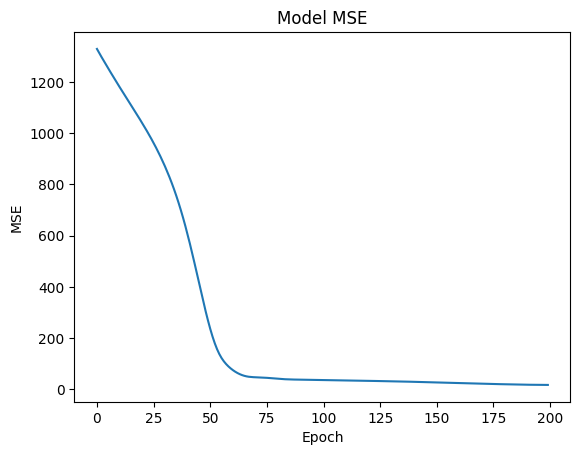

In [15]:
history = model.fit(X, y, epochs=200, verbose=0)
# Plot the MSE during training
plt.plot(history.history['loss'])
plt.title('Model MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()


In [23]:
import numpy as np

last_temperature_values = np.array([15, 35], dtype=float)
last_humidity_values = np.array([20, 40], dtype=float)
input_data = np.reshape(input_data, (input_data.shape[0], 1, input_data.shape[1]))
predicted_value = model.predict(input_data)
#predicted_value = model.predict(input_data)
print("Predicted temperature and humidity:", predicted_value)


ValueError: ignored

In [25]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

# define input sequence
input_data = np.array([[10, 20], [20, 30], [30, 40], [40, 50], [50, 60], [60, 70], [70, 80], [80, 90], [90, 100]])

# define the number of previous time steps to use as input variables to predict the next time period
n_steps = 3

# split the input sequence into samples
X, y = list(), list()
for i in range(len(input_data)):
    end_ix = i + n_steps
    if end_ix > len(input_data) - 1:
        break
    seq_x, seq_y = input_data[i:end_ix], input_data[end_ix]
    X.append(seq_x)
    y.append(seq_y)

# convert the list of samples into a 2D array
X = np.array(X)
y = np.array(y)

# reshape the input data to have a third dimension with a size of 1
X = X.reshape((X.shape[0], X.shape[1], 1))

# define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(2))

# compile the model
model.compile(optimizer='adam', loss='mse')

# fit the model to the training data
model.fit(X, y, epochs=200, verbose=0)

# use the model to make predictions
x_input = np.array([[80, 90], [90, 100], [100, 110]])
x_input = x_input.reshape((1, n_steps, 1))
y_pred = model.predict(x_input, verbose=0)
print(y_pred)


ValueError: ignored